In [5]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
# Load the dataset
combined_lysin_b_df = pd.read_json('combined_lysin_b_df.json')

ValueError: Trailing data

In [3]:
# Check data types and non-null counts
combined_lysin_b_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2483 entries, 0 to 2482
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   GeneID                   2483 non-null   object 
 1   Length                   2483 non-null   int64  
 2   Name                     2483 non-null   object 
 3   translation              2483 non-null   object 
 4   Notes                    2483 non-null   object 
 5   PhageID                  2483 non-null   object 
 6   HostStrain               2483 non-null   object 
 7   Cluster                  2483 non-null   object 
 8   LysinType                2483 non-null   object 
 9   Molecular_Weight         2483 non-null   float64
 10  Aromaticity              2483 non-null   float64
 11  Instability_Index        2483 non-null   float64
 12  Gravy                    2483 non-null   float64
 13  Isoelectric_Point        2483 non-null   float64
 14  Aliphatic_Index         

In [4]:
combined_lysin_b_df.describe()

,Length,Molecular_Weight,Aromaticity,Instability_Index,Gravy,Isoelectric_Point,Aliphatic_Index,Hydrophobicity,Protein_Length,Distance_From_Consensus,Hamming_Distance,Cluster_encoded,HostStrain_encoded
count,2483.000000,2483.000000,2483.000000,2483.000000,2483.000000,2483.000000,2483.000000,2483.000000,2483.000000,2483.000000,2483.000000,2483.000000,2483.00000
mean,976.101893,35254.773898,0.092064,34.497904,-0.162333,6.614307,84.967686,-0.162333,324.367298,0.959945,285.714056,56.393073,0.79259
std,190.174481,6262.594368,0.011701,6.120158,0.190851,1.350716,7.169783,0.190851,63.391494,0.019751,47.992315,44.242894,0.41535
min,609.000000,21611.236100,0.058419,16.612500,-0.487379,4.474843,65.454545,-0.487379,202.000000,0.897409,185.000000,0.000000,0.00000
25%,849.000000,30905.096000,0.082759,30.757144,-0.318938,5.682956,79.174174,-0.318938,282.000000,0.953368,245.000000,19.000000,1.00000
50%,972.000000,35961.657700,0.093093,34.021472,-0.206742,6.057297,84.577114,-0.206742,323.000000,0.961658,286.000000,44.000000,1.00000
75%,1029.000000,37787.245500,0.099415,39.200932,-0.026087,7.727539,91.908397,-0.026087,342.000000,0.973057,303.000000,98.000000,1.00000
max,1485.000000,52461.504600,0.123239,53.715254,0.213877,9.977272,104.826255,0.213877,494.000000,0.987565,449.000000,142.000000,2.00000


In [5]:
# Initialize MinMaxScaler
scaler = MinMaxScaler()

In [1]:
# Apply MinMaxScaler to the features and reverse scores where lower values are better
combined_lysin_b_df['Instability_Index_Score'] = 1 - scaler.fit_transform(combined_lysin_b_df[['Instability_Index']])
combined_lysin_b_df['Isoelectric_Point_Score'] = scaler.fit_transform(combined_lysin_b_df[['Isoelectric_Point']])
combined_lysin_b_df['Aliphatic_Index_Score'] = scaler.fit_transform(combined_lysin_b_df[['Aliphatic_Index']])
combined_lysin_b_df['Aromaticity_Score'] = scaler.fit_transform(combined_lysin_b_df[['Aromaticity']])
combined_lysin_b_df['Gravy_Score'] = scaler.fit_transform(combined_lysin_b_df[['Gravy']])
combined_lysin_b_df['Hydrophobicity_Score'] = scaler.fit_transform(combined_lysin_b_df[['Hydrophobicity']])
combined_lysin_b_df['Molecular_Weight_Score'] = 1 - scaler.fit_transform(combined_lysin_b_df[['Molecular_Weight']])
combined_lysin_b_df['Protein_Length_Score'] = 1 - scaler.fit_transform(combined_lysin_b_df[['Protein_Length']])
combined_lysin_b_df['Distance_From_Consensus_Score'] = 1 - scaler.fit_transform(combined_lysin_b_df[['Distance_From_Consensus']])
combined_lysin_b_df['Hamming_Distance_Score'] = 1 - scaler.fit_transform(combined_lysin_b_df[['Hamming_Distance']])

NameError: name 'scaler' is not defined

In [7]:
# Define groups including Aromaticity in stability
stability_features = ['Instability_Index_Score', 'Isoelectric_Point_Score', 'Aliphatic_Index_Score', 'Aromaticity_Score']
hydrophobicity_features = ['Gravy_Score', 'Hydrophobicity_Score']
size_features = ['Molecular_Weight_Score', 'Protein_Length_Score']
similarity_features = ['Distance_From_Consensus_Score', 'Hamming_Distance_Score']

In [8]:
# Calculate group scores
combined_lysin_b_df['Stability_Score'] = combined_lysin_b_df[stability_features].mean(axis=1)
combined_lysin_b_df['Hydrophobicity_Score'] = combined_lysin_b_df[hydrophobicity_features].mean(axis=1)
combined_lysin_b_df['Size_Score'] = combined_lysin_b_df[size_features].mean(axis=1)
combined_lysin_b_df['Similarity_Score'] = combined_lysin_b_df[similarity_features].mean(axis=1)

In [9]:
# Calculate the final Treatment Score as the average of group scores
group_scores = ['Stability_Score', 'Hydrophobicity_Score', 'Size_Score', 'Similarity_Score']
combined_lysin_b_df['Treatment_Score'] = combined_lysin_b_df[group_scores].mean(axis=1)

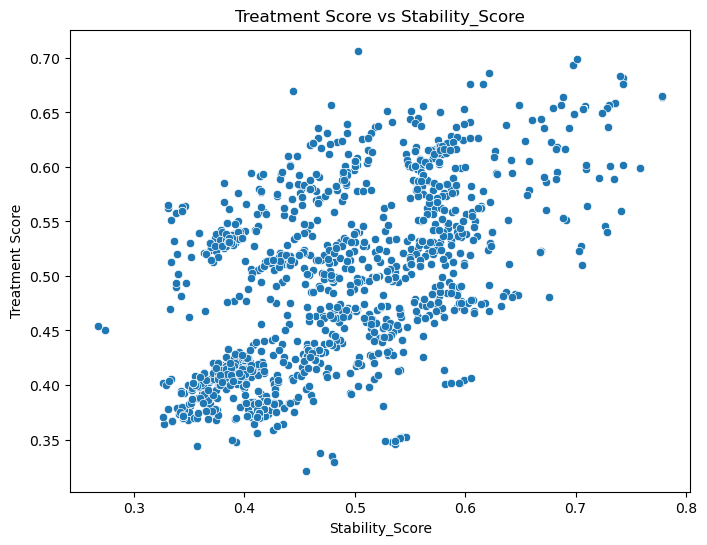

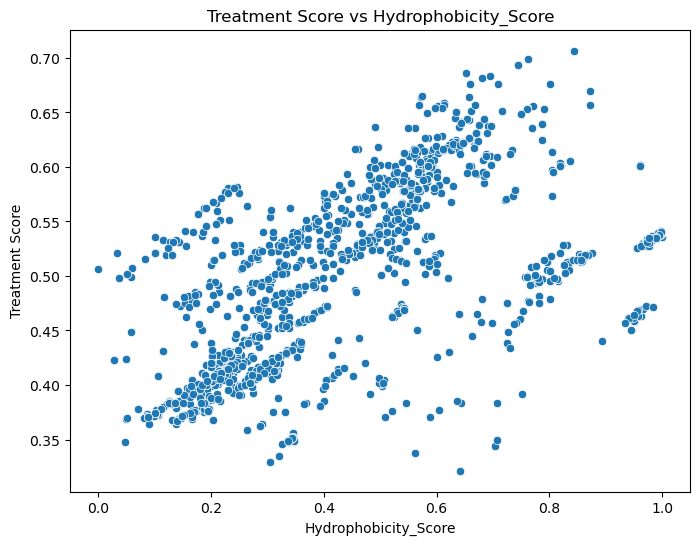

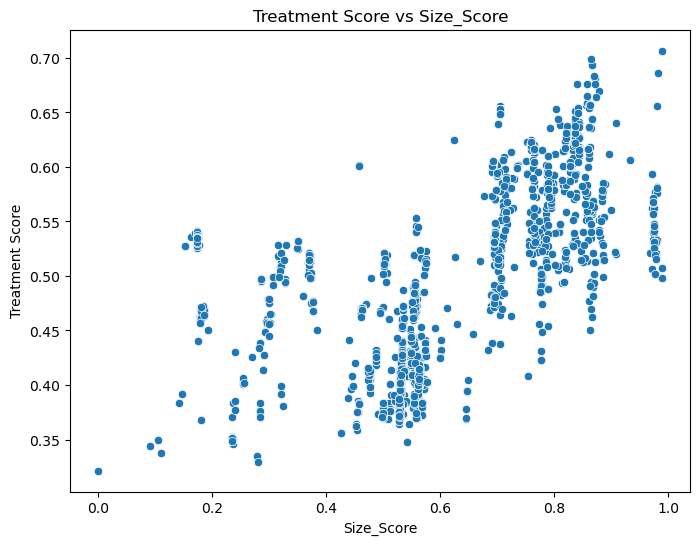

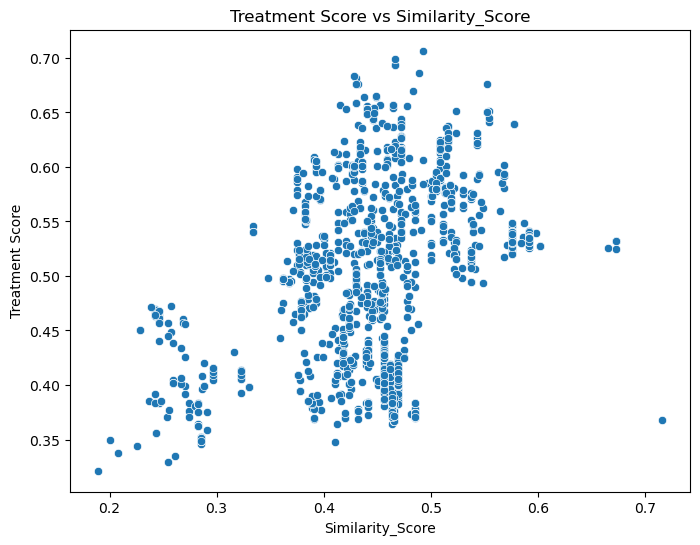

In [10]:
# Define the score columns
score_columns = [
    'Stability_Score', 'Hydrophobicity_Score', 'Size_Score', 'Similarity_Score'
]

# Plot each score against the Treatment Score
for score in score_columns:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=combined_lysin_b_df, x=score, y='Treatment_Score')
    plt.title(f'Treatment Score vs {score}')
    plt.xlabel(score)
    plt.ylabel('Treatment Score')
    plt.show()

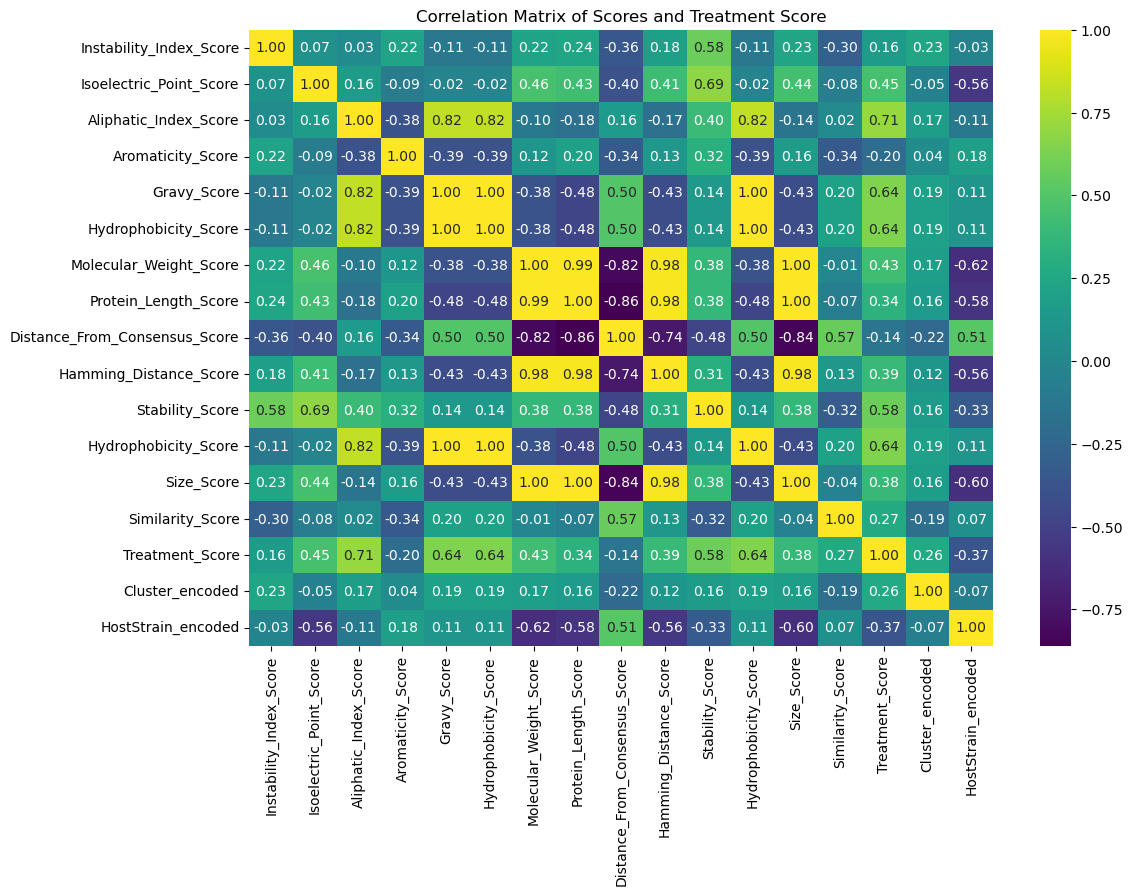

In [14]:
# Define all the score columns
score_columns = [
    'Instability_Index_Score', 'Isoelectric_Point_Score', 'Aliphatic_Index_Score', 'Aromaticity_Score',
    'Gravy_Score', 'Hydrophobicity_Score', 'Molecular_Weight_Score', 'Protein_Length_Score',
    'Distance_From_Consensus_Score', 'Hamming_Distance_Score', 'Stability_Score',
    'Hydrophobicity_Score', 'Size_Score', 'Similarity_Score', 'Treatment_Score', 'Cluster_encoded', 'HostStrain_encoded'
]

# Calculate the correlation matrix
correlation_matrix = combined_lysin_b_df[score_columns].corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f")
plt.title('Correlation Matrix of Scores and Treatment Score')
plt.show()

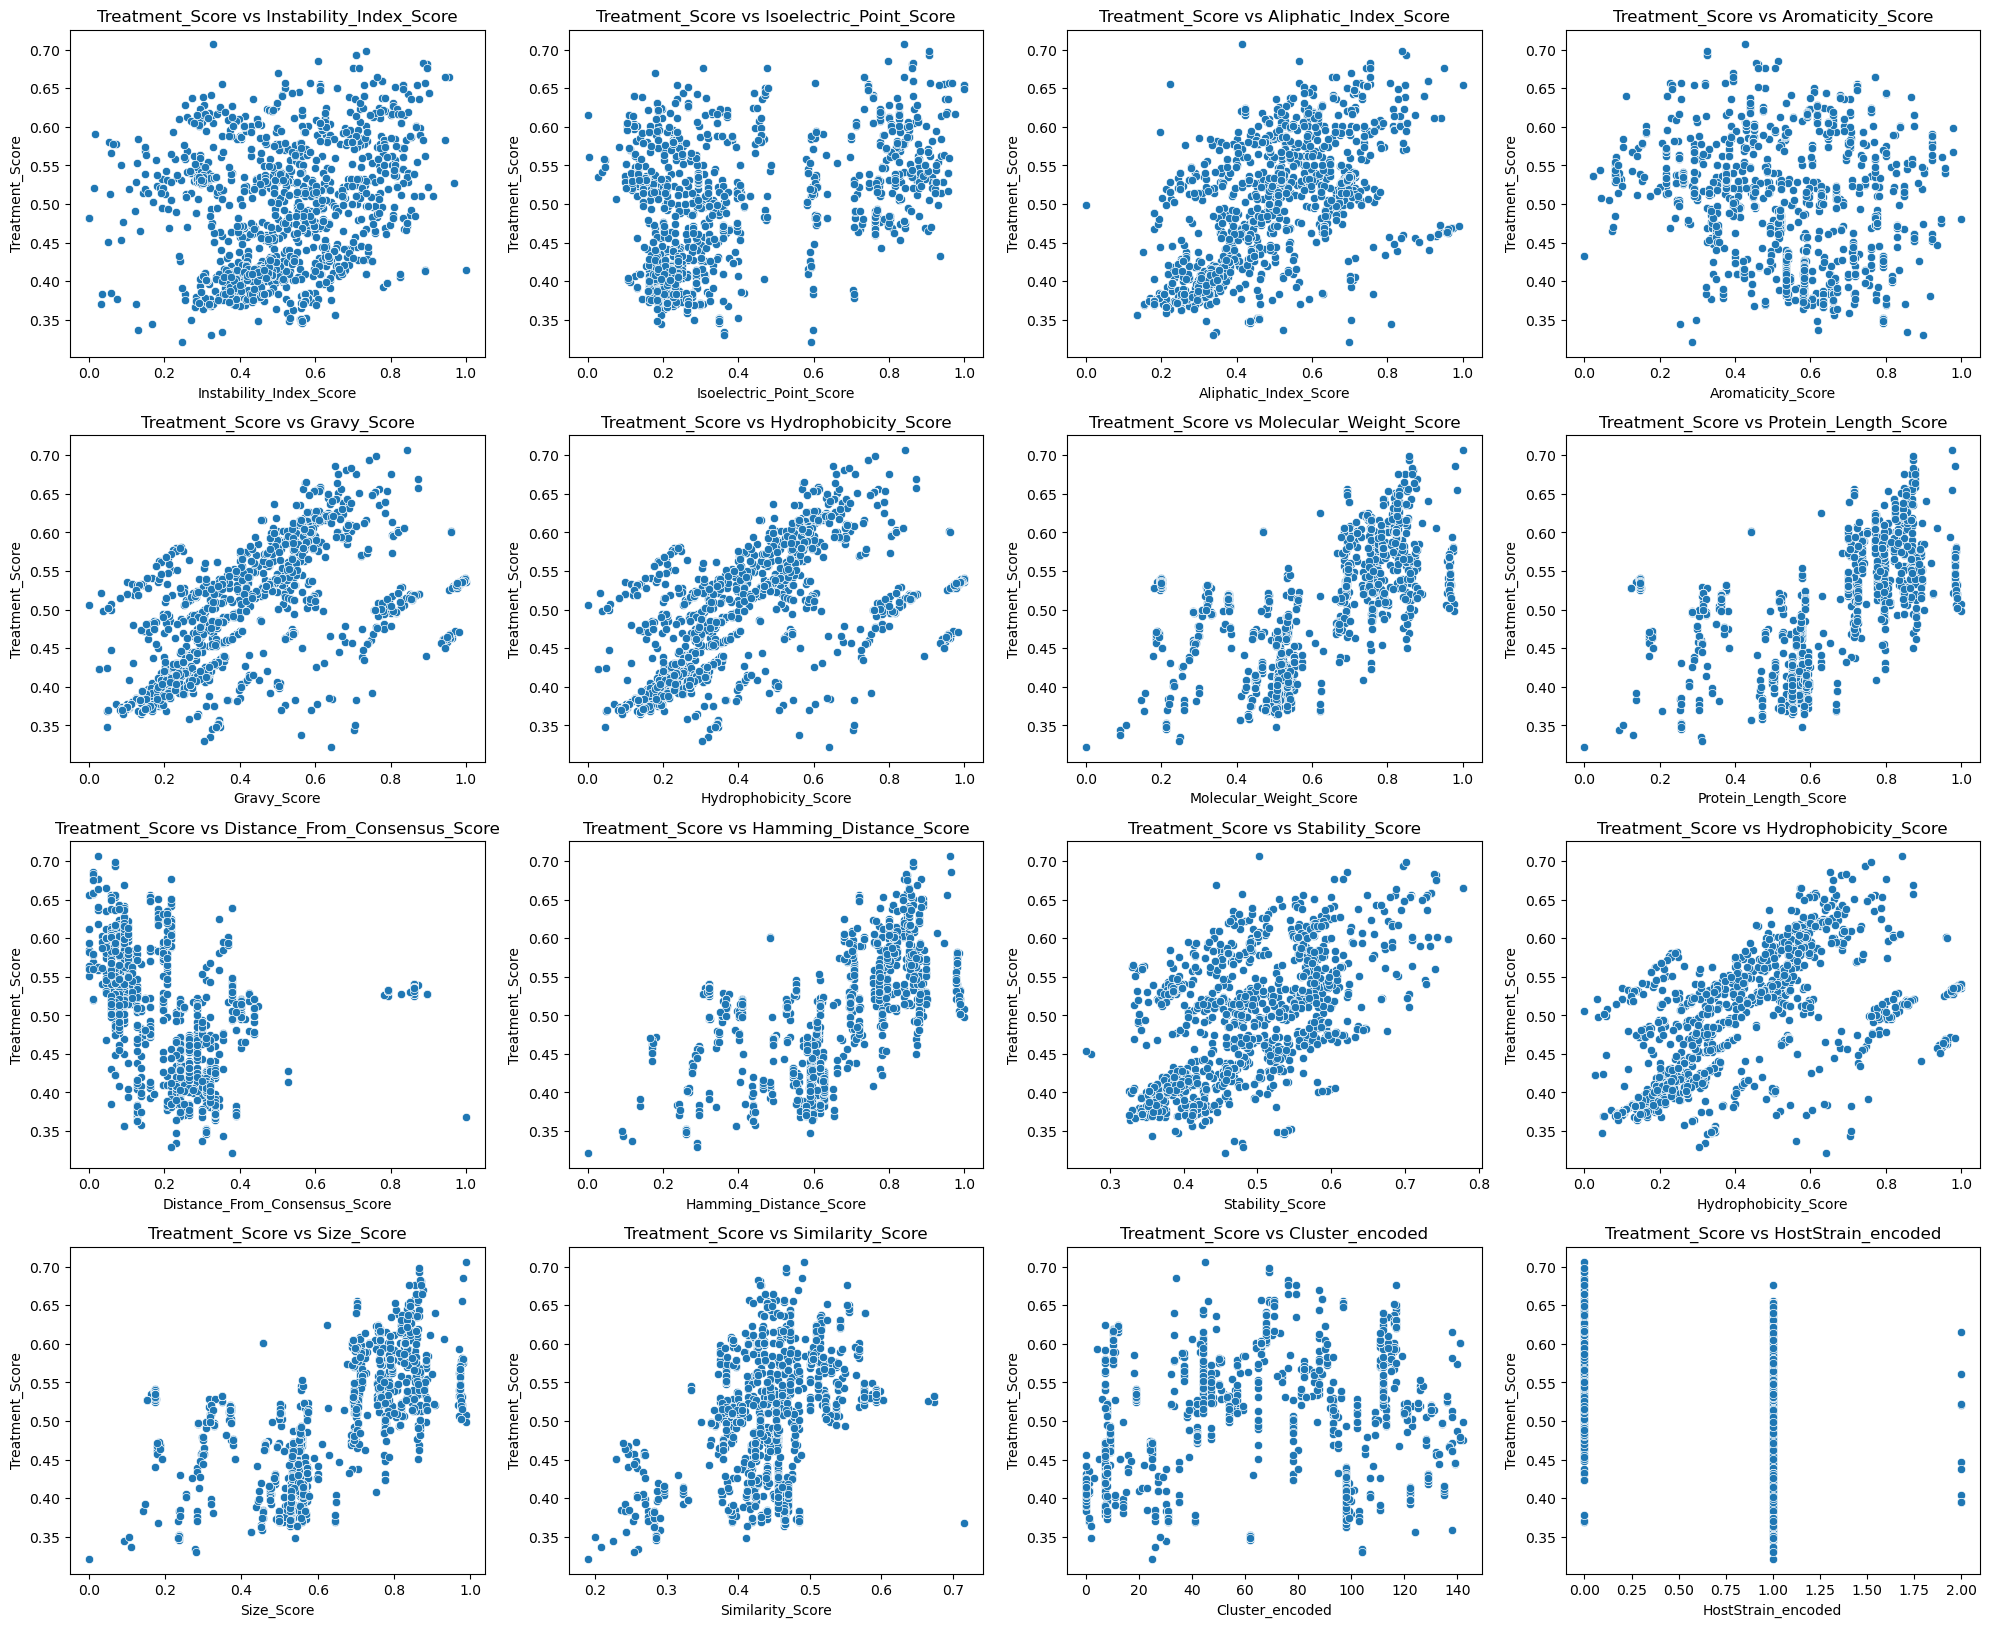

In [16]:
# List of features excluding Treatment_Score
score_columns = [
    'Instability_Index_Score', 'Isoelectric_Point_Score', 'Aliphatic_Index_Score', 'Aromaticity_Score',
    'Gravy_Score', 'Hydrophobicity_Score', 'Molecular_Weight_Score', 'Protein_Length_Score',
    'Distance_From_Consensus_Score', 'Hamming_Distance_Score', 'Stability_Score',
    'Hydrophobicity_Score', 'Size_Score', 'Similarity_Score', 'Cluster_encoded', 'HostStrain_encoded'
]

# Plot scatter plots
plt.figure(figsize=(20, 20))
for i, score in enumerate(score_columns, 1):
    plt.subplot(5, 4, i)
    sns.scatterplot(data=combined_lysin_b_df, x=score, y='Treatment_Score')
    plt.xlabel(score)
    plt.ylabel('Treatment_Score')
    plt.title(f'Treatment_Score vs {score}')

plt.tight_layout()
plt.show()